In [1]:
import matplotlib.pyplot as plt
import json
import itertools
import pandas as pd

In [24]:
with open('results.json') as f:
    data = json.load(f)
    
data_list = []

for run_idx, run in enumerate(data):
    for planner_run in run['planner_runs']:
        for ptp_idx, ptp_run in enumerate(planner_run['segments']):
            data_list.append({
                'run_idx': run_idx,
                'ptp_idx': ptp_idx,
                'apples': run['number_of_apples'],
                **planner_run,
                **ptp_run
            })
        
data_df = pd.DataFrame(data_list)

data_df.head()

,run_idx,ptp_idx,apples,intermediate_planner,ordering,segments,apple,feasible_solve_milliseconds,path_length,prm_edges_after_solve,prm_nodes_after_solve,solved
0,0,0,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[1.1685069894275073, -4.256360628607036, 3.640...",9,170.974549,58,11,True
1,0,1,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[0.8239779982303259, -1.2304805353958383, 3.69...",4,227.452450,88,16,True
2,0,2,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[-0.6788321044944504, -3.782591210366942, 7.56...",3,33.208163,122,21,True
3,0,3,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[-1.9193774078884092, -5.375168215638294, 5.21...",2,105.119109,152,26,True
4,0,4,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[0.9876616191886287, -4.070496878999986, 3.634...",2,66.638524,182,31,True


In [27]:
data_df[(data_df.solved) & (data_df.ptp_idx != 0)].groupby(['intermediate_planner', 'ordering']).plot.boxplot()

AttributeError: 'PlotAccessor' object has no attribute 'boxplot'

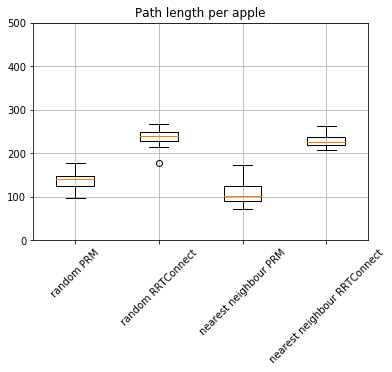

In [5]:
boxplot_points = {}

for run in data:
    for planner_run in run['planner_runs']:
        name = planner_run['ordering'] + ' ' + planner_run['intermediate_planner']
        point_to_point_lengths = [seg['path_length'] for seg in planner_run['segments'][1:] if seg['solved']]
        
        if name not in boxplot_points:
            boxplot_points[name] = []
        
        boxplot_points[name].append(sum(point_to_point_lengths) / len(point_to_point_lengths))

plt.boxplot(boxplot_points.values())
plt.xticks(range(1,5), boxplot_points.keys(), rotation=45)
plt.ylim(0,500)
plt.grid()
plt.title('Path length per apple')
plt.show()

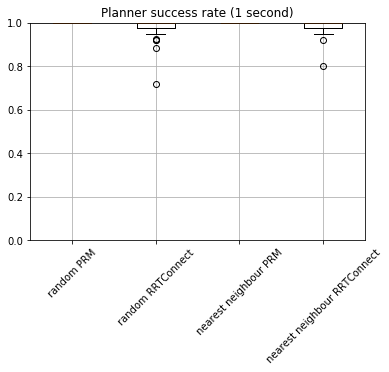

In [10]:
boxplot_points = {}

for run in data:
    for planner_run in run['planner_runs']:
        
        name = planner_run['ordering'] + ' ' + planner_run['intermediate_planner']
        
        success_rate = sum(1 for seg in planner_run['segments'][1:] if seg['solved']) / (len(planner_run['segments']) - 1)
        
        if name not in boxplot_points:
            boxplot_points[name] = []
        
        boxplot_points[name].append(success_rate)

plt.boxplot(boxplot_points.values())
plt.xticks(range(1,5), boxplot_points.keys(), rotation=45)
plt.ylim(0,1)
plt.grid()
plt.title('Planner success rate (1 second)')
plt.show()

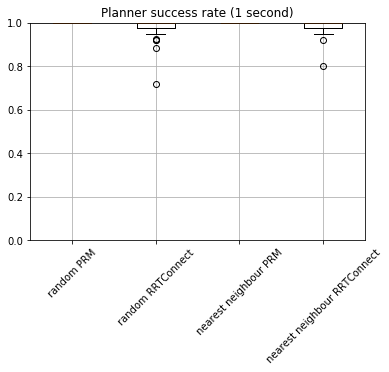

In [10]:
boxplot_points = {}

for run in data:
    for planner_run in run['planner_runs']:
        
        name = planner_run['ordering'] + ' ' + planner_run['intermediate_planner']
        
        success_rate = sum(1 for seg in planner_run['segments'][1:] if seg['solved']) / (len(planner_run['segments']) - 1)
        
        if name not in boxplot_points:
            boxplot_points[name] = []
        
        boxplot_points[name].append(success_rate)

plt.boxplot(boxplot_points.values())
plt.xticks(range(1,5), boxplot_points.keys(), rotation=45)
plt.ylim(0,1)
plt.grid()
plt.title('Planner success rate (1 second)')
plt.show()